## Examples for a dashboard notebook 

This notebook is an example of how to use python to have an overview of the MP dataset.  

**Warning**: this notebook requires that a directory called 'data' exists in the same directory where the notebook is stored.

#### External libraries and function to download descriptions from the MarketPlace dataset using the API
The following two cells are used to import the external libraries used in this Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
#both following imports are needed to use utils routines in this notebook
import import_ipynb
import utils

importing Jupyter notebook from utils.ipynb


### Download the items

To download the items use the function *getMPItems(category, localrepository, pages)*, set parameters as follows: 
<ul>
    <li>The value of <i>categories</i> parameter can be: toolsandservices, publications, trainingmaterials, workflows, datasets</li>
    <li>If the <i>localrepository</i> parameter is set to 'False' or is not set, the items are downloaded from the MP dataset, if instead the <i>localrepository</i> parameter is set to 'True' the items are first searched in the local repository and if they are not present they are downloaded from the remote MP dataset. When the items are downloaded from the remote MP dataset they are stored in the local repository.</li>
    <li>If the <i>pages</i> parameter is not provided all descriptions are returned, otherwise 20*pages items are returned.</li>
</ul>


The download of the interested items **must** be done in the initial part of every notebook.

In [2]:
df_tool_flat =utils.getMPItems ("toolsandservices", True)
df_tool_flat.index

getting data from local repository...


RangeIndex(start=0, stop=1655, step=1)

In [3]:
df_publication_flat =utils.getMPItems ("publications", True)
df_publication_flat.index

getting data from local repository...


RangeIndex(start=0, stop=2992, step=1)

In [4]:
df_trainingmaterials_flat =utils.getMPItems ("trainingmaterials", True)
df_trainingmaterials_flat.index

getting data from local repository...


RangeIndex(start=0, stop=142, step=1)

In [5]:
df_workflows_flat =utils.getMPItems ("workflows", True)
df_workflows_flat.index

getting data from local repository...


RangeIndex(start=0, stop=31, step=1)

In [6]:
df_datasets_flat =utils.getMPItems ("datasets", True)
df_datasets_flat.index

getting data from local repository...


RangeIndex(start=0, stop=292, step=1)

### Items by sources

We want to know all the sources and for each source the total number of item provided, independently from the category of items.  
We use the function *getAllItemsBySources()*, it returns a *dataframe* (it can be seen as a sort of excel sheet :) that contains two columns: in the first column there is the name of the source, in the second the number of items.  
The following code shows also a possible way to print the content of the dataframe.

In [7]:
#get the dataframe
df_items_by_sources=utils.getAllItemsBySources()
#prints the content of the dataframe
#print('{:<30}N. Items'.format("Source Label"), end='\n')
# the function head(n) shows the first n rows of a dataframe
df_items_by_sources.head(10)

DBLP                             2835
TAPoR                            1285
Zotero - 427927                   365
Humanities Data                   289
Programming Historian              83
Language Resource Switchboard      49
SSK                                28
EOSC Marketplace                   15
Recommended Items                   2
Name: source.label, dtype: int64

The following cell uses the function *plot* of the dataframe to draw a bar chart. 

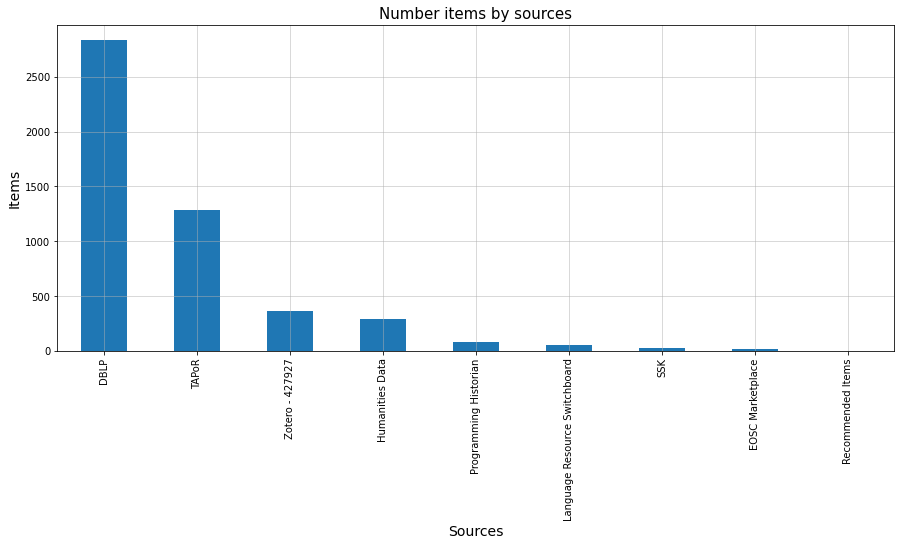

In [8]:
fig, ax = plt.subplots()
df_items_by_sources.plot(kind='bar', figsize=(15,6))
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number items by sources", fontsize=15)
ax.set_xlabel('Sources', fontsize=14)
ax.set_ylabel('Items', fontsize=14);
plt.show()

The function *getItemsBySources(category)* is used to obtain the sources of items in a specific category, for every source the total number of provided items is returned.  
The value of categories parameter can be: toolsandservices, publications, trainingmaterials, workflows, datasets.  
The following cell shows the sources for items in 'datasets' category.

In [9]:
temp_src=utils.getItemsBySources('toolsandservices')
temp_src.head()

TAPoR                            1284
Zotero - 427927                   160
Language Resource Switchboard      49
EOSC Marketplace                   15
Name: source.label, dtype: int64

### Completeness & metadata quality
Dataframe of item types crossed with mandatory+recommended fields per item types shows the  _number of null values_ in fields

In [10]:
df_null_values=utils.getNullValues()
df_null_values[0].head(35)

category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,0,23,524,1,2
composedOf,292,2992,1655,142,0
concept,292,2992,1655,142,31
concept.code,265,2989,552,66,1
concept.definition,266,2991,1578,141,18
concept.label,265,2989,552,66,1
concept.notation,267,2992,1655,142,31
concept.uri,265,2989,552,66,1
concept.vocabulary.accessibleAt,292,2992,1655,142,31


Dataframe of item types crossed with mandatory+recommended fields per item types to show the _ratio of null values_ in fields

In [11]:
df_null_values[1].head(35)

category,dataset,publication,tool-or-service,training-material,workflow
property: missed values (%),,,,,
accessibleAt,0.00,0.77,31.66,0.70,6.45
composedOf,100.00,100.00,100.00,100.00,0.00
concept,100.00,100.00,100.00,100.00,100.00
concept.code,90.75,99.90,33.35,46.48,3.23
concept.definition,91.10,99.97,95.35,99.30,58.06
concept.label,90.75,99.90,33.35,46.48,3.23
concept.notation,91.44,100.00,100.00,100.00,100.00
concept.uri,90.75,99.90,33.35,46.48,3.23
concept.vocabulary.accessibleAt,100.00,100.00,100.00,100.00,100.00


#### Getting null values for a specific list of properties

By passing to the getNullValues function a list of properties it is possible to check the *null* values for those properties. The parameter should contain 1 or more property names separated by ','. In the example below we search for null values of properties: *accessibleAt, description,* and  *contributors*.

In [12]:
df_null_values=utils.getNullValues('accessibleAt, contributors, relatedItems, year, tool-family')
df_null_values[0].head(5)

category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,0,23,524,1,2
contributors,0,100,399,40,1
relatedItems,291,2713,1407,87,28
year,292,154,1653,142,31
tool-family,292,2992,1505,142,31


The following code uses the __getItemsWithNullValues(props, all)__ function to get all items where the  properties indicated in the list have null values

In [13]:
df_items_null_values=utils.getItemsWithNullValues('accessibleAt, contributors, relatedItems', True)
df_items_null_values[['persistentId', 'category', 'label', 'accessibleAt', 'contributors', 'relatedItems']].tail()

,persistentId,category,label,accessibleAt,contributors,relatedItems
1626,vIh5e8,tool-or-service,Xournal,NaN,NaN,NaN
1636,b0NZuO,tool-or-service,Your Twapper Keeper,NaN,NaN,NaN
1642,k2esOX,tool-or-service,Zamzar,NaN,NaN,NaN
1649,0xnzgl,tool-or-service,Zoomerang,NaN,NaN,NaN
4817,0a8xXK,workflow,test,NaN,NaN,NaN


The following code uses the __getItemsWithNullValues(props, all)__ function to get all items where *at least one* of the  properties indicated in the list has null values

In [14]:
my_properties='accessibleAt, contributors, relatedItems, olderVersions'
df_items_null_values=utils.getItemsWithNullValues(my_properties, False)
df_items_null_values[['MPUrl', 'category', 'label', 'accessibleAt', 'contributors', 'relatedItems', 'olderVersions']].head()

,MPUrl,category,label,accessibleAt,contributors,relatedItems,olderVersions
0,tool-or-service/3IAyEp,tool-or-service,140kit,[https://github.com/WebEcologyProject/140kit],"[{'actor': {'id': 483, 'name': 'Ian Pearce, De...",NaN,"[{'id': 34009, 'category': 'tool-or-service', ..."
1,tool-or-service/U3gQrh,tool-or-service,3DF Zephyr - photogrammetry software - 3d mode...,[https://www.3dflow.net/3df-zephyr-pro-3d-mode...,NaN,"[{'id': 35991, 'persistentId': 'pXppX6', 'cate...","[{'id': 34010, 'category': 'tool-or-service', ..."
2,tool-or-service/MnpOWX,tool-or-service,3DHOP,[http://vcg.isti.cnr.it/3dhop/],NaN,NaN,"[{'id': 34013, 'category': 'tool-or-service', ..."
3,tool-or-service/gA7zFN,tool-or-service,3DHOP: 3D Heritage Online Presenter,[https://github.com/cnr-isti-vclab/3DHOP],NaN,NaN,"[{'id': 34014, 'category': 'tool-or-service', ..."
4,tool-or-service/Q49CiV,tool-or-service,3DReshaper \| 3DReshaper,[https://www.3dreshaper.com/en/],NaN,NaN,"[{'id': 34015, 'category': 'tool-or-service', ..."


The following code uses the __getItemsWithNullValues(props, all)__ function to get all items where *all*  properties indicated in the list have null values, the list contains *dynamic* properties

In [15]:
my_properties='accessibleAt, contributors, relatedItems, concept.uri, year'
df_props_values=utils.getItemsWithNullValues(my_properties,  True)
df_props_values[['MPUrl', 'category', 'label', 'accessibleAt', 'contributors', 'relatedItems','concept.uri', 'year']].head()

,MPUrl,category,label,accessibleAt,contributors,relatedItems,concept.uri,year
83,tool-or-service/QeOTEF,tool-or-service,Aruspix,NaN,NaN,NaN,NaN,NaN
113,tool-or-service/wytToi,tool-or-service,Basis Technology,NaN,NaN,NaN,NaN,NaN
152,tool-or-service/LeehSI,tool-or-service,Boxer,NaN,NaN,NaN,NaN,NaN
166,tool-or-service/n3S4Vt,tool-or-service,Carbonmade Online Portfolio,NaN,NaN,NaN,NaN,NaN
182,tool-or-service/3N2r4C,tool-or-service,Channelkit,NaN,NaN,NaN,NaN,NaN


In [16]:
rend_table_=df_props_values[['MPUrl', 'category', 'label', 'accessibleAt', 'contributors', 'relatedItems','concept.uri', 'year']]
clickable_null_table = rend_table_.style.format({'MPUrl': utils.make_clickable})
clickable_null_table

,MPUrl,category,label,accessibleAt,contributors,relatedItems,concept.uri,year
83,tool-or-service/QeOTEF,tool-or-service,Aruspix,nan,nan,nan,nan,nan
113,tool-or-service/wytToi,tool-or-service,Basis Technology,nan,nan,nan,nan,nan
152,tool-or-service/LeehSI,tool-or-service,Boxer,nan,nan,nan,nan,nan
166,tool-or-service/n3S4Vt,tool-or-service,Carbonmade Online Portfolio,nan,nan,nan,nan,nan
182,tool-or-service/3N2r4C,tool-or-service,Channelkit,nan,nan,nan,nan,nan
183,tool-or-service/XNj5wp,tool-or-service,chart.io,nan,nan,nan,nan,nan
221,tool-or-service/f4rEhz,tool-or-service,Coffitivity,nan,nan,nan,nan,nan
228,tool-or-service/HFFXTf,tool-or-service,Collex,nan,nan,nan,nan,nan
318,tool-or-service/hhmc6t,tool-or-service,DeeperWeb,nan,nan,nan,nan,nan
319,tool-or-service/YwdoJV,tool-or-service,Denemo,nan,nan,nan,nan,nan


### Tests for rendering

In [17]:
def highlight_min(s):
    '''
    highlight the minimum in a Series green.
    '''
    is_min = s == s.min()
    return ['background-color: cyan' if v else '' for v in is_min]

In [18]:
# df_null_values[1].head(10).style.apply(highlight_min).applymap(utils.color_highnumber_red)


In [19]:
# df_null_values[1].head(10).style.applymap(utils.color_highnumber_red)

## URLs checks for all attributes and properties with a URL 

... type: [“AccessibleAt”, “externalIDs”, “see-also”,  “usermanual-url”,  “helpdesk-url”,  “termsofuse-url”]
Empty
Broken
Automatic checks to replace broken links
flag/list accessibleAt URLs that should belong to ExternalIDs (Wikidata, Github...)???...  






The next cell uses the __chekURLValues__ function to get status of URLs value for a set of properties.
The function takes two parameters:
<ul>
    <li>the list of categories, mandatory. It must contain one or more categories, example: 'toolsandservices, publications', or the keyword *all* when all the downloaded categories should be inspected</li>
    <li>the list of properties containing URLs that must be controlled, optional, if not specified all predefined properties are inspected.</li>
</ul>


*Note: only valid properties are accessibleAt and url type properties*  https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types?perpage=100  
*Note 2: the  function uses multiprocessing, need to do some test...*
##### implementation in progress

In [50]:
df_urls=utils.checkURLValues('toolsandservices, publications', 'accessibleAt, user-manual-url')
df_urls.tail()

inspecting accessibleAt
inspecting user-manual-url


,MPUrl,persistentId,category,label,property,url,status
129,tool-or-service/jgkw6D,jgkw6D,tool-or-service,BibServer,accessibleAt,https://github.com/okfn/bibserver,200
130,tool-or-service/jgkw6D,jgkw6D,tool-or-service,BibServer,accessibleAt,https://github.com/okfn/bibserver,200
131,tool-or-service/jgkw6D,jgkw6D,tool-or-service,BibServer,accessibleAt,https://github.com/okfn/bibserver,200
132,tool-or-service/h8UTUS,h8UTUS,tool-or-service,Ethnic and Migrant Minorities (EMM) Survey Reg...,user-manual-url,https://ethmigsurveydatahub.eu/emmregistry/#Up...,200
133,tool-or-service/h8UTUS,h8UTUS,tool-or-service,Ethnic and Migrant Minorities (EMM) Survey Reg...,user-manual-url,https://ethmigsurveydatahub.eu/emmregistry/#Me...,200


In [51]:
myw_url_status=df_urls[df_urls['status'] == 404]
myclickable_table = myw_url_status.style.format({'MPUrl': utils.make_clickable})
myclickable_table

,MPUrl,persistentId,category,label,property,url,status
14,tool-or-service/X65rpU,X65rpU,tool-or-service,Acronym Finder - Beta (TAPoRware),accessibleAt,http://taporware.ualberta.ca/~taporware/betaTools/acronymfinder.shtml,404
22,tool-or-service/M6GUIw,M6GUIw,tool-or-service,Aggregator - Other (TAPoRware),accessibleAt,http://taporware.ualberta.ca/~taporware/otherTools/aggregator.shtml,404
97,tool-or-service/CWSlDg,CWSlDg,tool-or-service,Bibliopedia,accessibleAt,http://sul-cidr.github.io/Bibliopedia/,404


### Contextualisation - how interlinked are the items in the Marketplace?
- relations between items 
- special highlights for workflows (tbd)??


In [22]:
df_rel_it=utils.getAllRelatedItems()
df_rel_it.sort_values('label').head()

,item_persistentId,item_category,item_label,relation.label,persistentId,category,label,workflowId,description,relation.code
84,ip7fwu,tool-or-service,DH Press,Is mentioned in,t6q6FW,publication,"""A Pale Reflection of the Violent Truth? Pract...",NaN,No description provided.,is-mentioned-in
340,CduoOq,tool-or-service,Skype,Is mentioned in,BNGWfl,publication,"""A picture is worth a thousand words""? - From ...",NaN,No description provided.,is-mentioned-in
188,TKq1Xf,tool-or-service,Jekyll,Is mentioned in,N9gxvP,publication,"""Mapping Borges in the Argentine Publishing In...",NaN,No description provided.,is-mentioned-in
420,nsmMBS,tool-or-service,Tumblr,Is mentioned in,PDaLES,publication,"""My Name is Lizzie Bennet - "" Reading, Partici...",NaN,No description provided.,is-mentioned-in
437,Fi0HYt,tool-or-service,Twitter,Is mentioned in,PDaLES,publication,"""My Name is Lizzie Bennet - "" Reading, Partici...",NaN,No description provided.,is-mentioned-in


### From the document
    flag/list items with 0 relations - refined by item types  
    flag/list items with more than XX relations - refined by item types  
    (Possibility to check label and description values to suggest relations between items??)

The following cell code returns a dataframe with all the publications having 3 related items, it uses the function __getRelateditems (itemcategories, operator, nrelitems)__  returns a dataframe with items in a specific category having related items. 
The parameters are:

<ul>
    <li>categories: the list of categories. This parameter is mandatory, if the search should be done in all categories the keyword *all* can be used</li>
    <li> the operator.  Optional, accepted values are =, &lt; and &gt; (the default) </li> 
    <li> nrelitems: an optional parameter, if not present all items are returned.</li>
</ul>

In [23]:
df_test_ri=utils.getRelatedItems('publications', '=', 3)
df_test_ri.head(7)

,index,MPUrl,persistentId,category,label,relation.label,relitem_persistentId,relItem_category,relItem_label,workflowId,relItem_description,relation.code
0,48,publication/PDaLES,PDaLES,publication,"""My Name is Lizzie Bennet - "" Reading, Partici...",Mentions,0DR24Y,tool-or-service,YouTube,NaN,http://www.wikidata.org/entity/Q16971117,mentions
1,50,publication/PDaLES,PDaLES,publication,"""My Name is Lizzie Bennet - "" Reading, Partici...",Mentions,Fi0HYt,tool-or-service,Twitter,NaN,Twitter allows users to send 140-character mes...,mentions
2,49,publication/PDaLES,PDaLES,publication,"""My Name is Lizzie Bennet - "" Reading, Partici...",Mentions,nsmMBS,tool-or-service,Tumblr,NaN,Tumblr is a blogging/microblogging platform wi...,mentions
3,51,publication/B0MCj6,B0MCj6,publication,"""On the record"" - transcribing and valorizing ...",Is related to,lBZMh6,publication,In Search of the Drowned in the Words of the S...,NaN,No description provided.,is-related-to
4,52,publication/B0MCj6,B0MCj6,publication,"""On the record"" - transcribing and valorizing ...",Is related to,tEDt7j,workflow,Creation of a TEI-based corpus,NaN,"This scenario explains the steps to take, in o...",is-related-to
5,53,publication/B0MCj6,B0MCj6,publication,"""On the record"" - transcribing and valorizing ...",Is related to,LHblY8,tool-or-service,TEI Boilerplate,NaN,TEI Boilerplate is a lightweight solution for ...,is-related-to
6,11,publication/6ixzzW,6ixzzW,publication,A Ten-Year Summary of a SOA-based Micro-servic...,Mentions,LIFQCp,tool-or-service,JavaScript,NaN,"JavaScript, often abbreviated as JS, is a high...",mentions


The following cell code returns a dataframe with all the publications or tools and services having less than 5 related items

In [24]:
df_test_ri=utils.getRelatedItems('publications, toolsandservices', '<', 5)
df_test_ri.tail(7)

,index,MPUrl,persistentId,category,label,relation.label,relitem_persistentId,relItem_category,relItem_label,workflowId,relItem_description,relation.code
738,188,tool-or-service/orjfXo,orjfXo,tool-or-service,oXygen XML editor,Relates to,0H0PCB,dataset,Parlamint 1.0,NaN,This dataset contains National parliamentary d...,relates-to
739,213,tool-or-service/QO3kr7,QO3kr7,tool-or-service,project-specific EAD customization template,Is mentioned in,nWShB8,step,Express projects requirements in machine-reada...,HDhDLK,"With ODD, it is possible to customize a schema...",is-mentioned-in
740,217,tool-or-service/G1FPNq,G1FPNq,tool-or-service,repo,Is mentioned in,hAPEoS,publication,Toward Reproducibility in DH Experiments - A C...,NaN,No description provided.,is-mentioned-in
741,272,tool-or-service/NF1hKw,NF1hKw,tool-or-service,test,Is mentioned in,ckBYXe,publication,test_pub,NaN,test_pub,is-mentioned-in
742,345,publication/ckBYXe,ckBYXe,publication,test_pub,Mentions,NF1hKw,tool-or-service,test,NaN,test,mentions
743,346,publication/ckBYXe,ckBYXe,publication,test_pub,Mentions,CduoOq,tool-or-service,Skype,NaN,Skype allows free voice and video computer-to-...,mentions
744,162,tool-or-service/ZFJ7ZR,ZFJ7ZR,tool-or-service,🎵 Music notation engraving library for MEI wit...,Is mentioned in,pTeD0I,step,Present in an open source digital CMS the resu...,hbOhBk,If the published musical corpus is a critical\...,is-mentioned-in


### Example for  rendering

In [25]:
ren_test=utils.getRelatedItems('publications, toolsandservices', '>', 4)
#ren_test=ren_test[ren_test['relItem_category']=='step']
ren_test=ren_test[['MPUrl', 'persistentId', 'category','label', 'relation.label', 'relitem_persistentId','relItem_category', 'relItem_label']].sort_values('label')
clickable_table = ren_test.style.format({'MPUrl': utils.make_clickable})
clickable_table

,MPUrl,persistentId,category,label,relation.label,relitem_persistentId,relItem_category,relItem_label
0,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,fPLpV3,tool-or-service,Scribe
22,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,dGUzbN,tool-or-service,ORCA
23,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,oQk5dR,tool-or-service,TM
24,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,2jtDpF,tool-or-service,MorphAdorner
25,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,0k5kuI,tool-or-service,Pliny
26,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,QQE0TQ,tool-or-service,XSugar
27,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,jw4cdL,tool-or-service,WordSeer
28,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,l75CzL,tool-or-service,Zotero
29,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,SXdupV,tool-or-service,OpenLayers
30,publication/KzRjeN,KzRjeN,publication,"6th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2011, Stanford, CA, USA, June 19-22, 2011, Conference Abstracts",Mentions,QQd3D5,tool-or-service,Transcribe


### Checking values on Properties

#### Checking values on all downloaded items
The function *getProperties()* returns a dataframe with all the properties saved in a local repository.

In [26]:
df_prop_data=utils.getProperties()
#print('{:<25}Number of missing values'.format("Property"), end='\n')
df_prop_data.isnull().sum()

id                                     0
value                               3306
type.code                              0
type.label                             0
type.type                              0
type.groupName                      1385
type.hidden                            0
type.ord                               0
type.allowedVocabularies            9710
concept.code                        9710
concept.vocabulary.code             9710
concept.vocabulary.label            9710
concept.vocabulary.accessibleAt    13016
concept.label                       9710
concept.notation                    9710
concept.definition                  9710
concept.uri                         9710
concept                            13016
ts_label                               0
ts_persistentId                        0
ts_category                            0
dtype: int64

In [27]:
df_prop_data.iloc[1]

id                                                                            187060
value                                                                           None
type.code                                                                   activity
type.label                                                                  Activity
type.type                                                                    concept
type.groupName                                                        Categorisation
type.hidden                                                                    False
type.ord                                                                          17
type.allowedVocabularies           [{'code': 'tadirah2', 'label': '', 'accessible...
concept.code                              https://vocabs.dariah.eu/tadirah/gathering
concept.vocabulary.code                                                     tadirah2
concept.vocabulary.label                                         

#### Values in *type.code*

The following cell inspect the dataframe obtained with *getProperties()* function to search for all possible values in *type.code* property

In [28]:
a_df=df_prop_data#.drop_duplicates(['type.code','ts_label'])
df_temp_tc_label = a_df['type.code'].value_counts()
print('{:<28}Frequency'.format("Type Code"), end='\n')
df_temp_tc_label.head(50)

Type Code                   Frequency


activity                       3165
year                           2840
keyword                        1930
pages                          1604
terms-of-use                   1301
media                          1252
processed-at                    157
tool-family                     150
license                         108
thumbnail                        82
volume                           66
version                          61
authentication                   56
issue                            56
journal                          36
object-format                    32
conference                       31
see-also                         18
life-cycle-status                15
geographical-availabilities      15
technical-readiness-level        15
source-last-update               12
media-caption                     7
user-manual-url                   2
mode-of-use                       1
access-policy-url                 1
publisher                         1
privacy-policy-url          

In [29]:
myd=a_df[a_df['type.code']=='user-manual-url']
myd.head()

,id,value,type.code,type.label,type.type,type.groupName,type.hidden,type.ord,type.allowedVocabularies,concept.code,...,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,concept,ts_label,ts_persistentId,ts_category
1550,207393,https://ethmigsurveydatahub.eu/emmregistry/#Up...,user-manual-url,User Manual URL,url,Context,False,23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnic and Migrant Minorities (EMM) Survey Reg...,h8UTUS,tool-or-service
1551,207394,https://ethmigsurveydatahub.eu/emmregistry/#Me...,user-manual-url,User Manual URL,url,Context,False,23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnic and Migrant Minorities (EMM) Survey Reg...,h8UTUS,tool-or-service


### Values in *type.code* and *concept.label*

The following cells inspect the dataframe obtained with *getProperties()* function to search for all possible values in *concept.label* property combined with *type.code*, needs to be organized in a function to be useful...

In [30]:
test=a_df[['type.code','concept.label']]
test=test.groupby('type.code')['concept.label'].apply(list).reset_index(name='concepts') 

In [31]:
import itertools
from collections import Counter, defaultdict
cooccurrences = []

for ind, row in test.iterrows():
    for concept in row['concepts']:
        if not pd.isnull(concept):
            cooccurrences.append((row['type.code'], concept))
properties_co_counter = Counter(cooccurrences)

In [32]:
print("type.code concept.label values Frequency", '\n')
print('{:<58}{}'.format('  [Type    Concept]', 'Frequency \n'))
for k, v in properties_co_counter.most_common(80):
    topics = '['+k[0] + ', ' + k[1]+']'
    print(f'{topics:<60}{v}')
    
print('\nMedian Property Cooccurrence Freqency:')
print(np.median(list(properties_co_counter.values())))

type.code concept.label values Frequency 

  [Type    Concept]                                       Frequency 

[activity, Analyzing]                                       571
[activity, Visual Analysis]                                 289
[activity, Content Analysis]                                219
[activity, Discovering]                                     169
[activity, Capturing]                                       150
[activity, Enriching]                                       121
[activity, Annotating]                                      117
[activity, Disseminating]                                   115
[activity, Gathering]                                       113
[license, Creative Commons Attribution 4.0 International]   105
[activity, Organizing]                                      101
[activity, Collaborating]                                   90
[activity, Publishing]                                      89
[activity, Sharing]                                      

### *To be checked*

From the [Curation Notebooks](https://docs.google.com/document/d/1HfxWGE-YXIrBW7DGU3hZxT751WF5gdGMk6mTf7F49f8/edit#heading=h.sxw2zb795aqg) document:  
*Can we get a link with the list of items for each line of the result (a link with the 571 items using [activity, Analyzing] for example?)*

The following cell:
<ul>
    <li> gets all the properties and sources</li>
    <li> create a subset of the dataframe by filetring the values of the properties <i>type.code</i> and <i> concept.label</i></li>
    <li> shows some rows of the obtained dataframe, it actually doesn't show all columns but only those explicitly indicated</li>
 </ul>

This can be defined as an *utils* function.

In [33]:
df_items=utils.getPropertiesBySources()
my_df_items=df_items[(df_items["type.code"]=='activity') & (df_items["concept.label"]=='Analyzing')]
my_df_items[['type.code', 'type.label','concept.code', 'concept.label', 'label','persistentId', 'source.label']].head()

,type.code,type.label,concept.code,concept.label,label,persistentId,source.label
2,activity,Activity,https://vocabs.dariah.eu/tadirah/analyzing,Analyzing,140kit,3IAyEp,TAPoR
30,activity,Activity,https://vocabs.dariah.eu/tadirah/analyzing,Analyzing,80legs,qlAb3F,TAPoR
45,activity,Activity,https://vocabs.dariah.eu/tadirah/analyzing,Analyzing,ABFREQ,sI9Dw6,TAPoR
102,activity,Activity,https://vocabs.dariah.eu/tadirah/analyzing,Analyzing,All Our Ideas,MiDcF3,TAPoR
109,activity,Activity,https://vocabs.dariah.eu/tadirah/analyzing,Analyzing,Altmetric,uiyt2K,TAPoR


#### Query properties *concept.label*
It is possible to investigate what are the sources of concept labels. In the following cell there is the code to check what are the labels and the sources of items that have'application/pdf' as property:
<ol>
    <li>first the dataframe with all the properties and sources is obtained: <i>df_tmp=utils.getPropertiesBySources()</i></li>
    <li>then it is filtered with the desired value: <i>tmp_prop=df_tmp[df_tmp['concept.label']=='application/pdf']</i></li>
    <li>then the filtered dataframe is shown: <i>tmp_prop[['concept.label', 'concept.uri', 'label', 'source.label']].head(23)</i>.  Notice that the columns of the dataframe that must be displayed are explicitly defined</li>
<ol>

In [34]:
df_tmp=utils.getPropertiesBySources()
tmp_prop=df_tmp[df_tmp['concept.label']=='application/pdf']
tmp_prop[['type.code','concept.label', 'concept.uri', 'label', 'source.label']].head()

,type.code,concept.label,concept.uri,label,source.label
15070,object-format,application/pdf,http://www.iana.org/assignments/media-types/ap...,20th Century Poetry,Humanities Data
15173,object-format,application/pdf,http://www.iana.org/assignments/media-types/ap...,"""A Visual Style in Two Network Sitcoms"" data",Humanities Data
15183,object-format,application/pdf,http://www.iana.org/assignments/media-types/ap...,BFM2019 corpus,Humanities Data
15200,object-format,application/pdf,http://www.iana.org/assignments/media-types/ap...,Canadiana,Humanities Data
15288,object-format,application/pdf,http://www.iana.org/assignments/media-types/ap...,"""Could Fiction Have an Information History? St...",Humanities Data


#### Checking property values in a specific item category
The function *getPropertiesValues(category, propertyname)* is used to obtain the frequency of a propertyname in the defined category of items. The value of 'category' parameter can be: toolsandservices, publications, trainingmaterials, workflows, datasets. The value of propertyname can be any valid property name.  
In the next cells examples are shown to obtain frequency of 'concept.uri', 'type.code' and 'concept.labels' values for 'toolsandservices', 'publications' and 'datasets'

In [35]:
df_categ_properties=utils.getPropertiesValues('toolsandservices', 'concept.uri')
df_categ_properties.head()

https://vocabs.dariah.eu/tadirah/analyzing          570
https://vocabs.dariah.eu/tadirah/visualAnalysis     289
https://vocabs.dariah.eu/tadirah/contentAnalysis    218
https://vocabs.dariah.eu/tadirah/discovering        168
https://vocabs.dariah.eu/tadirah/capturing          148
Name: concept.uri, dtype: int64

In [36]:
df_categ_properties=utils.getPropertiesValues('publications', 'type.code')
df_categ_properties.head()

year            2838
pages           1593
keyword          261
processed-at     157
volume            57
Name: type.code, dtype: int64

In [37]:
df_categ_properties=utils.getPropertiesValues('datasets', 'concept.label')
df_categ_properties.head()

application/pdf                                   25
image/tiff                                         7
Creative Commons Attribution 4.0 International     1
Editing                                            1
Network Analysis                                   1
Name: concept.label, dtype: int64

#### Investigating properties values by sources
In progress..

In [38]:
df_list_of_properties_sources=utils.getPropertiesBySources()
#df_list_of_properties_sources.head()

In [39]:
tt_df=df_list_of_properties_sources.groupby(['concept.label', 'source.label']).count()['label'].unstack('source.label')

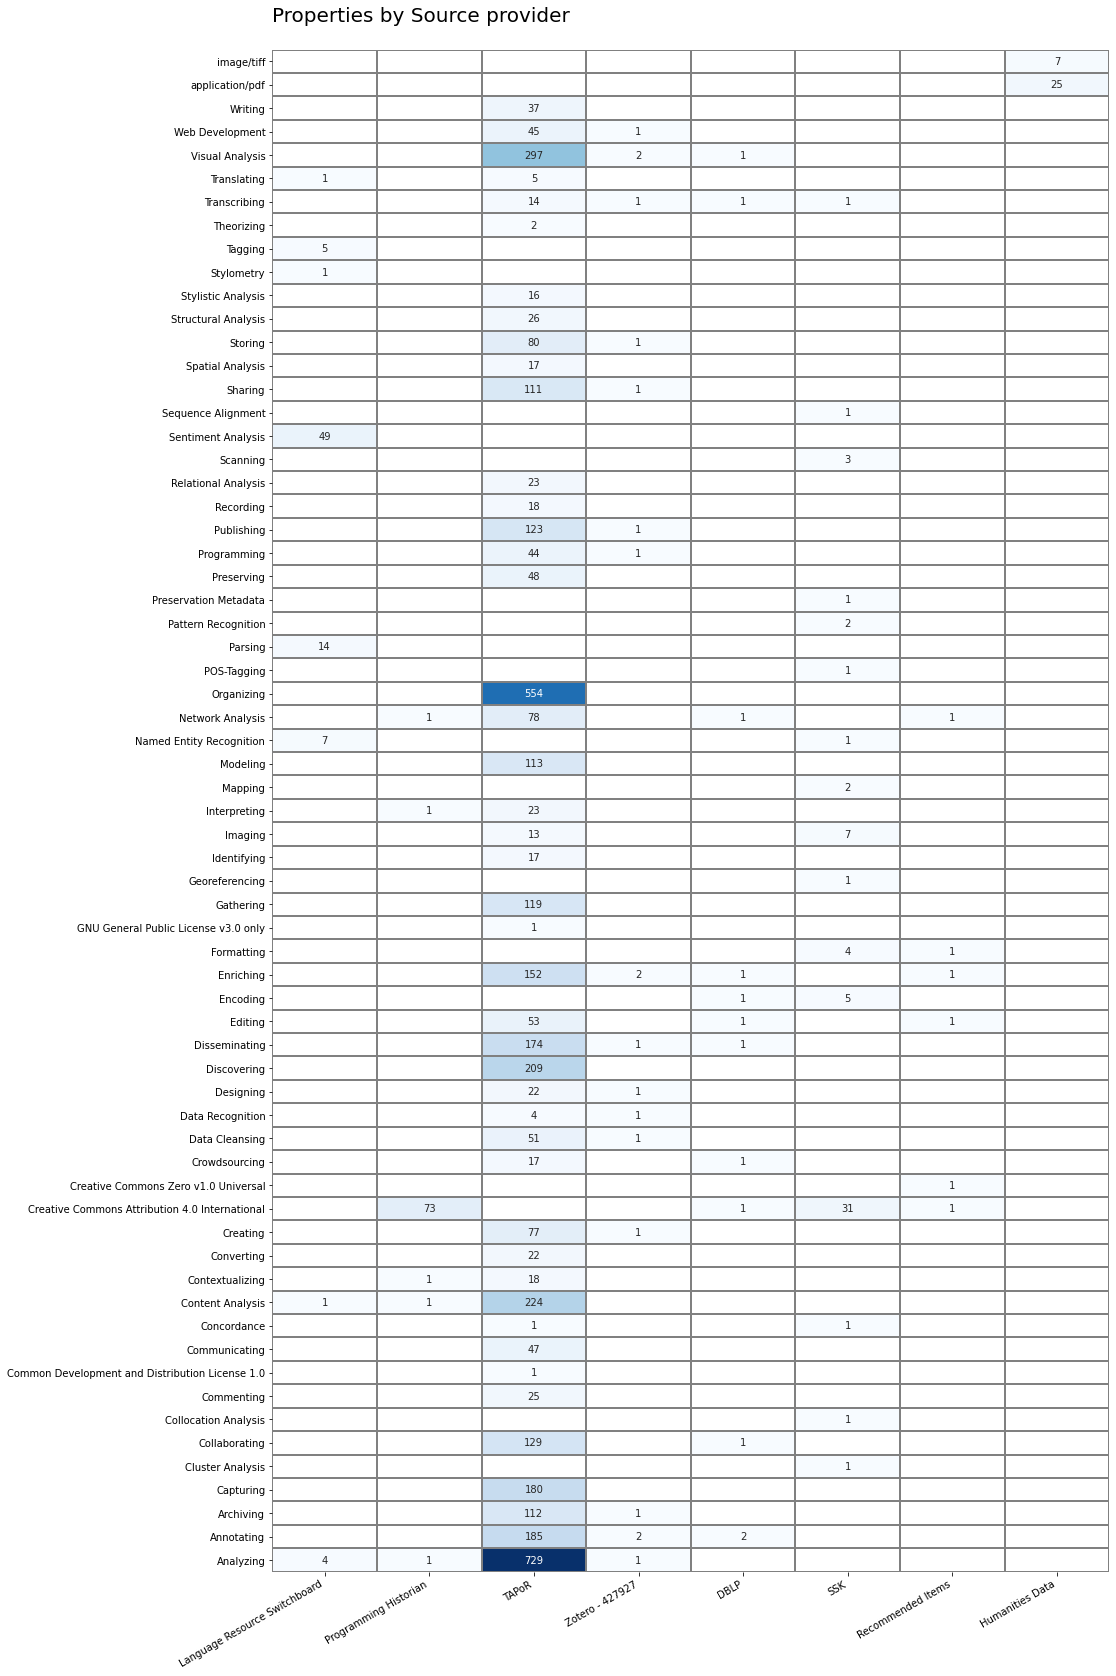

In [40]:
fig, ax = plt.subplots(figsize=(15, 28))
sns.heatmap(tt_df, annot=True, linewidths=0.1, fmt='.0f', ax=ax, cbar=None, cmap='Blues', linecolor='gray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel(None)
ax.set_ylabel(None)
#sns.heatmap(df, linewidths=2, linecolor='yellow')
title = 'Properties by Source provider\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

The following cells return the same information but for properties filtered by the *type.code*  value

In [41]:
#the type.code value used as filter value
typecode='activity'
df_list_of_properties_sources=utils.getPropertiesBySources()
#filter properties by type.code
df_list_of_activity_properties=df_list_of_properties_sources[df_list_of_properties_sources["type.code"]==typecode]

In [42]:
tt_a_df=df_list_of_activity_properties.groupby(['concept.label', 'source.label']).count()['label'].unstack('source.label')

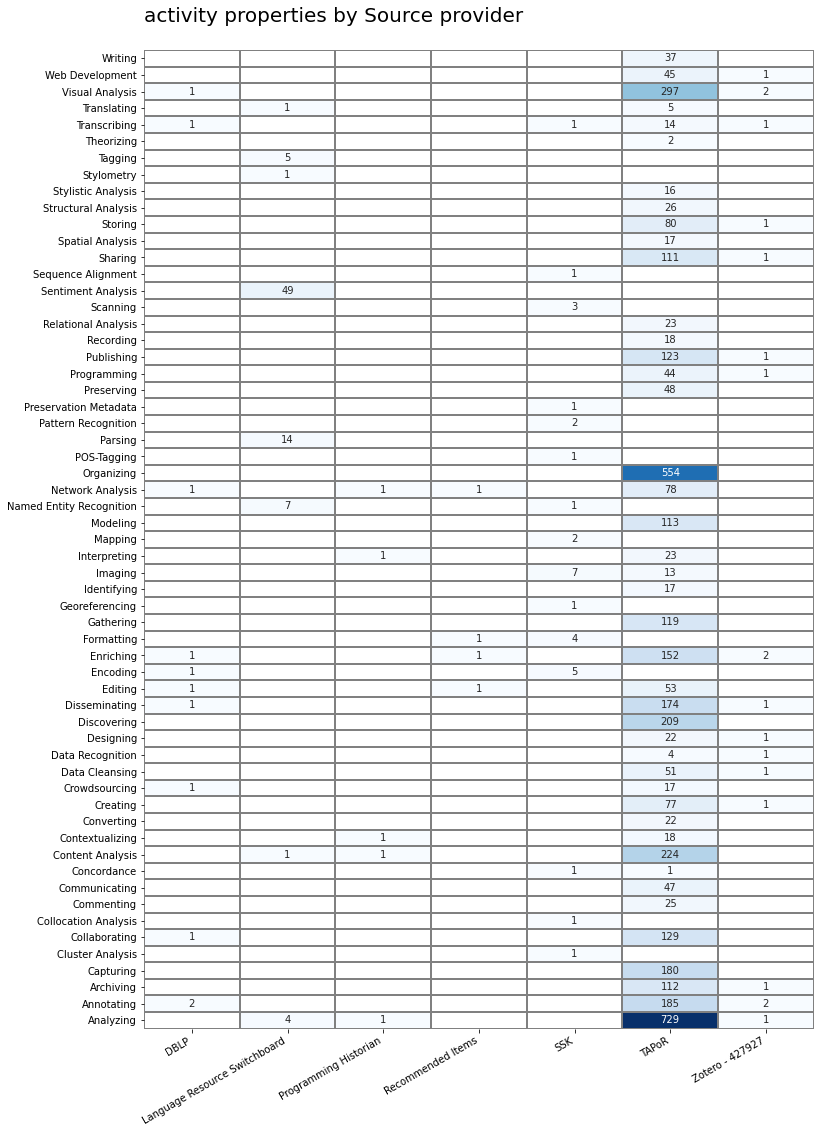

In [43]:
#change values in the next lines to resize the table
fig, ax = plt.subplots(figsize=(12, 18))
sns.heatmap(tt_a_df, annot=True, linewidths=0.1, fmt='.0f', ax=ax, cbar=None, cmap='Blues', linecolor='gray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel(None)
ax.set_ylabel(None)
#sns.heatmap(df, linewidths=2, linecolor='yellow')
title = typecode+' properties by Source provider\n'
plt.title(title, loc='left', fontsize=20)
plt.show()